Sequence ID: 9INS_1|Chain
Description: 9INS_1|Chain A|INSULIN (CHAIN A)|Sus scrofa (9823)
Sequence Length: 21
Sequence: GIVEQCCTSICSLYQLENYCN


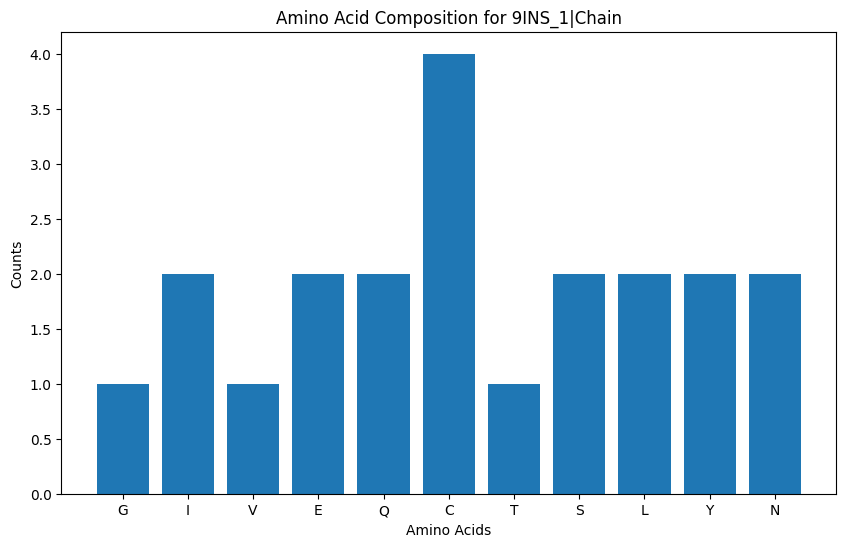

Sequence ID: 9INS_2|Chain
Description: 9INS_2|Chain B|INSULIN (CHAIN B)|Sus scrofa (9823)
Sequence Length: 30
Sequence: FVNQHLCGSHLVEALYLVCGERGFFYTPKA


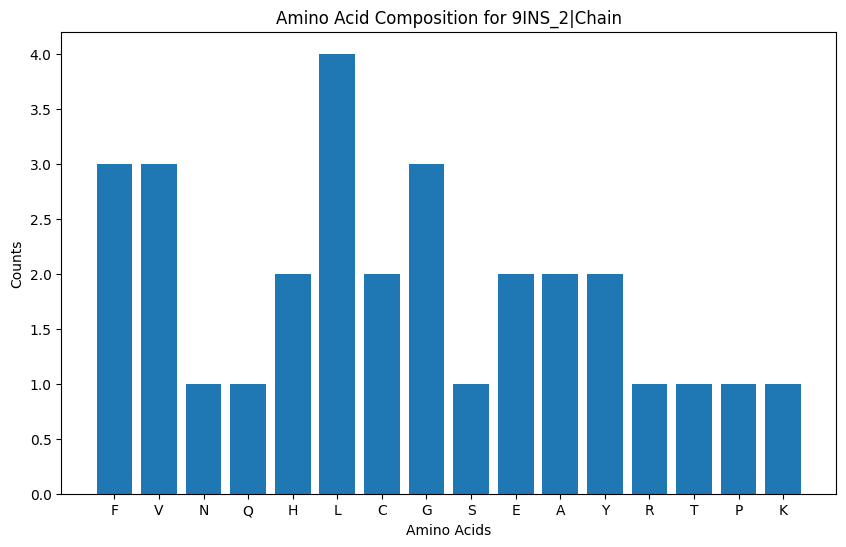

In [2]:
from Bio import SeqIO
from collections import Counter
import matplotlib.pyplot as plt

fasta_file = 'rcsb_pdb_9INS.fasta'
sequences = list(SeqIO.parse(fasta_file, "fasta"))

for record in sequences:
    print(f"Sequence ID: {record.id}")
    print(f"Description: {record.description}")
    print(f"Sequence Length: {len(record.seq)}")
    print(f"Sequence: {record.seq}")

    amino_acid_count = Counter(record.seq)
    
    amino_acids = list(amino_acid_count.keys())
    counts = list(amino_acid_count.values())
    
    plt.figure(figsize=(10, 6))
    plt.bar(amino_acids, counts)
    plt.xlabel('Amino Acids')
    plt.ylabel('Counts')
    plt.title(f'Amino Acid Composition for {record.id}')
    plt.show()

In [3]:
from Bio.Blast import NCBIWWW, NCBIXML

for record in sequences:
    # Perform BLAST search
    result_handle = NCBIWWW.qblast("blastp", "nr", record.seq)

    # Parse the BLAST results
    blast_records = NCBIXML.parse(result_handle)
    blast_record = next(blast_records)

    # Get the top 10 hits
    top_hits = []
    for alignment in blast_record.alignments[:10]:
        for hsp in alignment.hsps:
            top_hits.append((alignment.title, alignment.length, hsp.score))

    # Print the top 10 hits
    print(f"\nTop 10 BLAST hits for {record.id}:")
    for i, hit in enumerate(top_hits):
        print(f"Hit {i+1}: {hit[0]}")


Top 10 BLAST hits for 9INS_1|Chain:
Hit 1: ref|XP_026338704.1| insulin [Ursus arctos] >ref|XP_040495583.1| insulin [Ursus maritimus]
Hit 2: ref|XP_039081000.1| insulin [Hyaena hyaena]
Hit 3: ref|XP_045626705.1| insulin [Ursus americanus]
Hit 4: gb|KAG8522541.1| Insulin [Galemys pyrenaicus]
Hit 5: ref|XP_036716824.1| insulin [Balaenoptera musculus]
Hit 6: ref|XP_058924587.1| insulin [Kogia breviceps]
Hit 7: gb|AAA17540.1| insulin, partial [Oryctolagus cuniculus]
Hit 8: ref|XP_032735660.1| insulin [Lontra canadensis]
Hit 9: gb|KAI5761314.1| INS protein [Gulo gulo luscus] >gb|KAI5761510.1| INS protein [Gulo gulo luscus]
Hit 10: ref|XP_053418912.1| insulin [Nycticebus coucang]

Top 10 BLAST hits for 9INS_2|Chain:
Hit 1: gb|MXQ90486.1| hypothetical protein [Bos mutus]
Hit 2: gb|AGC54790.1| insulin precursor, partial [synthetic construct]
Hit 3: pdb|1APH|B Chain B, INSULIN B CHAIN (PH 7) [Bos taurus] >pdb|1B17|B Chain B, PROTEIN (INSULIN b chain) [Sus scrofa] >pdb|1B18|B Chain B, PROTEIN (I